In [1]:
NAME = "Mohamed Rakha"

---

# Lab 6: Skip Gram

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [2]:
#!pip install gensim
!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 


import pandas as pd
import numpy as np 
import gensim



--2020-11-06 01:42:58--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.105.29
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.105.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.9MB/s    in 97s     

2020-11-06 01:44:35 (16.3 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



### **Q1 (1 point)** 
Find the cosine similarity between the following word pairs

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)

In [3]:
#Replace 0 with the code / value; Do not delete this cell
from gensim.models import KeyedVectors,Word2Vec
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

similarity_pair1 = model.similarity('France','England')
similarity_pair2 = model.similarity('smaller','bigger')
similarity_pair3 = model.similarity('England','London')
similarity_pair4 = model.similarity('France','Rocket')
similarity_pair5 = model.similarity('big','bigger')



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [4]:
#This is an autograded cell, do not edit/delete
print(similarity_pair1, similarity_pair2, similarity_pair3, similarity_pair4, similarity_pair5)

0.39804944 0.7302272 0.43992856 0.07114174 0.68423855


### **Q2 (1 point)** 
Write an expression to extract the vector representations of the words: 

- France
- England
- smaller
- bigger
- rocket
- big

Get only the first 5 elements for each vector representation.

In [5]:
#Replace 0 with the code / value to get the first 5 elements of each vector; Do not delete this cell
vector_1 = model['France'][:5]
vector_2 = model['England'][:5]
vector_3 = model['smaller'][:5]
vector_4 = model['bigger'][:5]
vector_5 = model['rocket'][:5]
vector_6 = model['big'][:5]


In [6]:
#This is an autograded cell, do not edit/delete
print(vector_1)
print(vector_2)
print(vector_3)
print(vector_4)
print(vector_5)
print(vector_6)


[0.04858398 0.07861328 0.32421875 0.03491211 0.07714844]
[-0.19824219  0.11523438  0.0625     -0.05834961  0.2265625 ]
[-0.05004883  0.03417969 -0.0703125   0.17578125  0.00689697]
[-0.06542969 -0.09521484 -0.06225586  0.16210938  0.01989746]
[-0.03198242  0.27148438 -0.2890625  -0.15429688  0.16894531]
[ 0.11132812  0.10595703 -0.07373047  0.18847656  0.07666016]


### **Q3 (1 point)** 
Find the euclidean distances between the word pairs : 

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)


In [7]:
#Replace 0 with the code / value; Do not delete this cell
eu_dist1 = np.linalg.norm(model['France'] - model['England'])
eu_dist2 = np.linalg.norm(model['smaller'] - model['bigger'])
eu_dist3 = np.linalg.norm(model['England'] - model['London'])
eu_dist4 = np.linalg.norm(model['France'] - model['Rocket'])
eu_dist5 = np.linalg.norm(model['big'] - model['bigger'])



In [8]:
#This is an autograded cell, do not edit / delete
print(eu_dist1)
print(eu_dist2)
print(eu_dist3)
print(eu_dist4)
print(eu_dist5)


3.0151067
1.8618743
2.8752837
3.892071
1.9586496


### **Q4 (1 point)**
Time to dabble with the power of Word2Vec. Find the 2 closest words  for the following conditions:  
- (King - Man + Queen)
- (bigger - big + small)
- (waiting - wait + run)
- (Texas + Milwaukee – Wisconsin)

In [9]:
#Replace 0 with the code / value; Do not delete this cell
closest1 = model.most_similar(positive=['King','Queen'], negative=['Man'])[:2]
closest2 = model.most_similar(positive=['bigger','small'], negative=['big'])[:2]
closest3 = model.most_similar(positive=['waiting','run'], negative=['wait'])[:2]
closest4 = model.most_similar(positive=['Texas','Milwaukee'], negative=['Wisconsin'])[:2]






/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [11]:
#This is an autograded cell, do not edit/delete
print(closest1)
print(closest2)
print(closest3)
print(closest4)


[('Queen_Elizabeth', 0.5257916450500488), ('monarch', 0.5004087090492249)]
[('larger', 0.7402471899986267), ('smaller', 0.732999324798584)]
[('running', 0.5654535889625549), ('runs', 0.49640005826950073)]
[('Houston', 0.7767744064331055), ('Fort_Worth', 0.7270511388778687)]


### **Q5 (3 points)**
Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

*Note : Since there are ~3Mil words in the vocabulary, you can downsample it to ~20-30k randomly selected words*

**Do not delete the below cell**

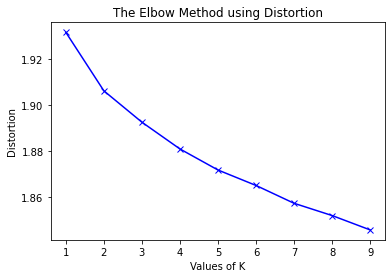

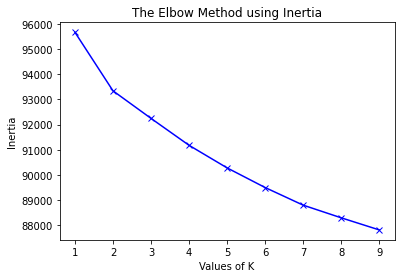

In [12]:
# YOUR CODE HERE
from random import sample
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt  


w = sample(list(model.vocab), 20000)

X = np.array([model[i] for i in w])

distortions = [] 
inertias = []
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)   
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show();
plt.figure()
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

Using the Elbow method, we can see that k=2 would produce the best clustering.

In [13]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

cluster_1 = model.similar_by_vector(kmeans.cluster_centers_[0])[:10]
cluster_2 = model.similar_by_vector(kmeans.cluster_centers_[1])[:10]
print(cluster_1)
print(cluster_2)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Emil_Protalinski_Published', 0.9208360910415649), ('By_HuDie_####-##-##', 0.9189769625663757), ('BY_GEOFF_KOHL', 0.9180129766464233), ('By_QianMian_####-##-##', 0.9176691770553589), ('By_XiaoBing_####-##-##', 0.9155663847923279), ('BY_DANNY_GALLAGHER', 0.9135993719100952), ('STACY_LEE', 0.9122923612594604), ('By_Riva_Froymovich', 0.9104891419410706), ('FOOD_OOH_IT', 0.909004807472229), ('REYNOLDS_GALLERY', 0.9080684185028076)]
[('http_dol##.net_index###.html_http', 0.9168618321418762), ('dol##.net_index####.html_http_dol##.net', 0.907284140586853), ('index###.html_http_dol##.net_index###.html', 0.906091570854187), ('Deltagen_undertakes', 0.9056306481361389), ('By_TRICIA_SCRUGGS', 0.9006041288375854), ('BY_STEFANIE_WHITE', 0.8992483615875244), ('Manufacturing_bioplastics', 0.8988685011863708), ('PRESCRIPTION_DRUGS_Gradually', 0.8966537117958069), ('http_dol##.net_index####.html_http', 0.8959100842475891), ('SIX_ROG_VX', 0.8955453038215637)]


The first cluster seems to be authors/publishers. The second cluster seems to be more random, which is expected using a bunch of random words that must be clustered into 2 clusters only.

### **Q6 (1 point)**
What loss function does the skipgram model use and briefly describe what this function is minimizing.

**Do not delete the below cell**

In [14]:
# YOUR CODE HERE
# The loss function the model uses is an entropy loss function. It uses stochastic gradient descent to
# optimize the objective function.

### **Bonus Question (1 point)** 
Find at least 2 interesting word vec combinations like the ones given in Q4

**Do not delete the below cell**

In [15]:
# YOUR CODE HERE
print(model.most_similar(positive=['Berkeley','Stanford'], negative=['Los_Angeles'])[:2])
print(model.most_similar(positive=['Google','Facebook'], negative=['Amazon'])[:2])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('UC_Berkeley', 0.5877782702445984), ('Harvard', 0.5630755424499512)]
[('social_networking', 0.6394062042236328), ('Gmail', 0.6102304458618164)]


### **Lab 6b**

1. Generate embeddings from the corpus you have chosen.




In [16]:
import os
import string
import pandas as pd
import numpy as np
import re
import pprint
from urllib.request import urlopen

import gensim
from gensim import corpora, models, similarities
import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
url = "http://www.gutenberg.org/files/1342/1342-0.txt" ## Pride and Prehudice raw text
resp = urlopen(url)
raw = resp.read().decode('utf8')
firstlook = tokenize.sent_tokenize(raw)

In [19]:
raw[:100]

'\ufeff\r\nThe Project Gutenberg EBook of Pride and Prejudice, by Jane Austen\r\n\r\nThis eBook is for the use o'

In [20]:
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

In [21]:
tokenized_raw[:10]

['The Project Gutenberg EBook of Pride and Prejudice , by Jane Austen This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever .',
 'You may copy it , give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www .',
 'gutenberg .',
 'org Title : Pride and Prejudice Author : Jane Austen Release Date : August 26 , 2008 [ EBook 1342 ] Last Updated : November 12 , 2019 Language : English Character set encoding : UTF-8 * * * START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE * * * Produced by Anonymous Volunteers , and David Widger THERE IS AN ILLUSTRATED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK [ 42671 ] cover Pride and Prejudice By Jane Austen CONTENTS Chapter 1 Chapter 2 Chapter 3 Chapter 4 Chapter 5 Chapter 6 Chapter 7 Chapter 8 Chapter 9 Chapter 10 Chapter 11 Chapter 12 Chapter 13 Chapter 14 Chapter 15 Chapter 16 Chapter 17 Chapter 18 Chapter 19 Chapter 20 Chapter 21 Chapter 

In [22]:
# Remove punctuations
nopunct = []
for sent in tokenized_raw:
    a = [w for w in sent.split() if w not in string.punctuation]
    nopunct.append(" ".join(a))

In [23]:
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]
tok_corp[:3]

[['The',
  'Project',
  'Gutenberg',
  'EBook',
  'of',
  'Pride',
  'and',
  'Prejudice',
  'by',
  'Jane',
  'Austen',
  'This',
  'eBook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever'],
 ['You',
  'may',
  'copy',
  'it',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'Project',
  'Gutenberg',
  'License',
  'included',
  'with',
  'this',
  'eBook',
  'or',
  'online',
  'at',
  'www'],
 ['gutenberg']]

In [24]:
### Creating a list of unique words 
unique_words = list(set([item for sublist in tok_corp for item in sublist]))
len(unique_words)

7391

In [25]:
model = gensim.models.Word2Vec(tok_corp, min_count=1, size=16, window=5)
vector_list = model[unique_words]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


2. Based on your knowledge and understand of the text corpus you have chosen, form 3 hypotheses of analogies or relationships you expect will hold and give a reason why. Experimentally validate these hypotheses. (e.g., if using Moby Dick as the corpus, one hypothesis might be that the whale, "Mobie Dick" is (cosine) more similar to "good" than to "evil" and is more similar to "opposition" than to "mystery")

In [32]:
# 3 Hypotheses - Pride and Prejudice

#1) Elizabeth = smart/clever
print('1)' , model.similarity('Elizabeth', 'smart')) # 0.826119
print(model.similarity('Elizabeth', 'clever'))       # 0.9731325

#2) Darcy = rich
print('2)' , model.similarity('Darcy', 'rich'))      # 0.95735455
print(model.similarity('Darcy', 'wealth'))           # 0.96908617

#3) Jane = gentle/nice
print('3)' , model.similarity('Jane', 'gentle'))     # 0.9850125
print(model.similarity('Jane', 'beautiful'))         # 0.9943616

1) 0.826119
0.9731325
2) 0.95735455
0.96908617
3) 0.9850125
0.9943616


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` 

3. Use T-SNE or PCA to reduce the dimensionality of the vectors to two dimensions for:

GoogleNews corpus pre-trained vectors:

In [34]:
model2 = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
model20k = model2.wv.index2entity[:20000]
model2_vectors = model2[model20k]
data_embed2=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(model2_vectors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.989s...
[t-SNE] Computed neighbors for 20000 samples in 362.154s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for 

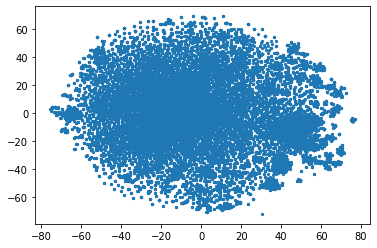

In [35]:
x_axis2= data_embed2[:,0]
y_axis2=data_embed2[:,1]

plt.scatter(x_axis2, y_axis2, s=5)
plt.show()

The embeddings you just generated:

In [26]:
from sklearn.manifold import TSNE

# Lets dim reduce the 16 dimension vectors to 2 dimensions to vizualise the dataset 
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list)


## Parameters
## n_components = number of dimensions you want your data to be reduced
## preplexity =  Number of neighboours to fit the gaussian , normally 30 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7391 samples in 0.019s...
[t-SNE] Computed neighbors for 7391 samples in 1.082s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7391
[t-SNE] Computed conditional probabilities for sample 2000 / 7391
[t-SNE] Computed conditional probabilities for sample 3000 / 7391
[t-SNE] Computed conditional probabilities for sample 4000 / 7391
[t-SNE] Computed conditional probabilities for sample 5000 / 7391
[t-SNE] Computed conditional probabilities for sample 6000 / 7391
[t-SNE] Computed conditional probabilities for sample 7000 / 7391
[t-SNE] Computed conditional probabilities for sample 7391 / 7391
[t-SNE] Mean sigma: 0.029989
[t-SNE] Computed conditional probabilities in 0.901s
[t-SNE] Iteration 50: error = 87.0184326, gradient norm = 0.0189651 (50 iterations in 4.015s)
[t-SNE] Iteration 100: error = 78.0575104, gradient norm = 0.0032036 (50 iterations in 3.193s)
[t-SNE] Iteration 150: error = 77.5124283, gradient norm = 

In [27]:
## Vizualise
%matplotlib inline
from matplotlib import pyplot as plt

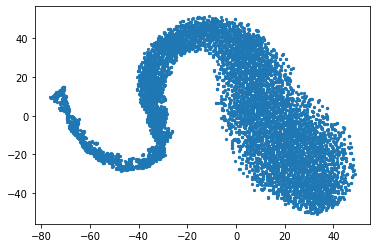

In [28]:
x_axis= data_embed[:,0]
y_axis=data_embed[:,1]

plt.scatter(x_axis, y_axis, s=5)
plt.show()

Words are not as evenly scattered as the Google model and are therefore generally related to one another with an interesting pattern perhaps due to the contexts of the words.  

In [43]:
import pandas as pd

df = pd.DataFrame(data_embed)
df['words'] = unique_words
df = df.rename(columns = {0: 'x', 1: 'y'})
df.to_csv('tsvfile.tsv', sep='\t', index=False)

In [44]:
from google.colab.output import eval_js
from IPython.display import Javascript

In [45]:
!git clone https://github.com/CAHLR/d3-scatterplot.git

fatal: destination path 'd3-scatterplot' already exists and is not an empty directory.


In [46]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8000
data_file = 'tsvfile.tsv'
height = 1600

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>